### Projekt UPA 2022, druhá část

Tým: Adam Sedmík (xsedmi04), Radek Veverka (xvever13)

Vítejte u řešení našeho projektu. Dokumentace je koncipována tak, že pro každý bod zadání jsou popořadě jednotlivé kapitoly se stručným komentářem, co a jak je prováděno, a doprovodným obrazovým či tabulkovým materiálem.

Vybranou datavou sadou jsou tučňáci, tedy varianta 2.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

#### 1) Prozkoumejte jednotlivé atributy datové sady, jejich typ a hodnoty, kterých nabývají (počet hodnot, nejčastější hodnoty, rozsah hodnot atd.) 

Nejprve načteme datový soubor do datových struktur knihovny `pandas`. 
Následně vygenerujeme přehledy o atributech a zobrazíme přehledně v následujících tabulkách. 

Pro kategorické atributy zjistíme celkové počty hodnot, počet unikátních hodnot a která hodnota je nejčastější (i její počet).
Pro numerické atributy zjistíme počet, střední hodnotu, rozptyl a kvartily.

Rozložení hodnot atributů bude tématem další kapitoly.

In [2]:
# Load data and print basic info about the attributes

data = pd.read_csv("penguins_lter.csv")
desc_quant = data.describe(include=np.number).transpose()
desc_quant.insert(0, "dtype", data.dtypes)

desc_categ = data.describe(include=object).transpose()
desc_categ.insert(0, "dtype", data.dtypes)

display(desc_categ)
display(desc_quant)


,dtype,count,unique,top,freq
studyName,object,344,3,PAL0910,120
Species,object,344,3,Adelie Penguin (Pygoscelis adeliae),152
Region,object,344,1,Anvers,344
Island,object,344,3,Biscoe,168
Stage,object,344,1,"Adult, 1 Egg Stage",344
Individual ID,object,344,190,N61A2,3
Clutch Completion,object,344,2,Yes,308
Date Egg,object,344,50,11/27/07,18
Sex,object,334,3,MALE,168
Comments,object,26,7,Nest never observed with full clutch.,13


,dtype,count,mean,std,min,25%,50%,75%,max
Sample Number,int64,344.0,63.151163,40.430199,1.00000,29.000000,58.000000,95.250000,152.00000
Culmen Length (mm),float64,342.0,43.921930,5.459584,32.10000,39.225000,44.450000,48.500000,59.60000
Culmen Depth (mm),float64,342.0,17.151170,1.974793,13.10000,15.600000,17.300000,18.700000,21.50000
Flipper Length (mm),float64,342.0,200.915205,14.061714,172.00000,190.000000,197.000000,213.000000,231.00000
Body Mass (g),float64,342.0,4201.754386,801.954536,2700.00000,3550.000000,4050.000000,4750.000000,6300.00000
Delta 15 N (o/oo),float64,330.0,8.733382,0.551770,7.63220,8.299890,8.652405,9.172123,10.02544
Delta 13 C (o/oo),float64,331.0,-25.686292,0.793961,-27.01854,-26.320305,-25.833520,-25.062050,-23.78767


### 2) Prozkoumejte rozložení hodnot jednotlivých atributů pomocí vhodných grafů, zaměřte se i na to, jak hodnota jednoho či dvou atributů ovlivní rozložení hodnot jiného atributu. Do dokumentace vložte alespoň 5 různých grafů, zobrazujících zjištěná rozložení hodnot. Použijte různé typy grafů (např. bodový graf, histogram, krabicový nebo houslový graf, graf složený z více podgrafů apod.)

Nejprve prozkoumáme četnosti tučňáku dle jejich dvou podstatných rysů - hmotnosti a pohlaví. K tomu poslouží histogramy. Následně se také podíváme, zdali existuje nějaká závislost mezi pohlavím a hmotností.

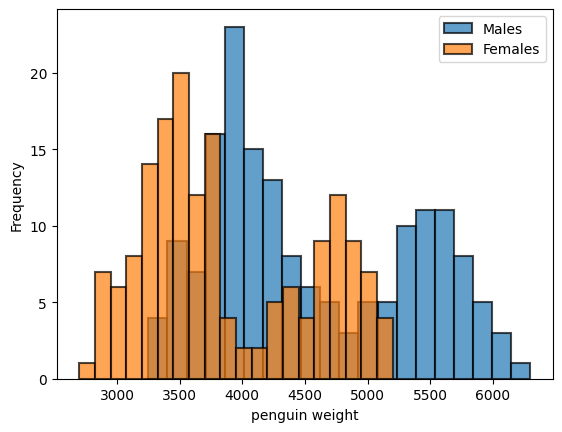

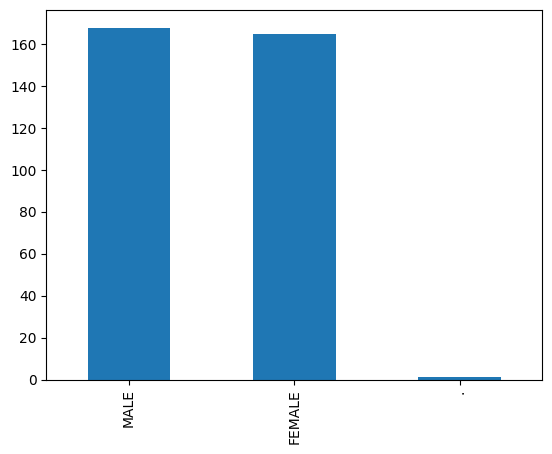

In [3]:
plt.xlabel("penguin weight")
data.loc[data["Sex"] == "MALE", "Body Mass (g)"].plot.hist(bins=20, edgecolor="black", linewidth=1.5, alpha=0.7, label="Males")
data.loc[data["Sex"] == "FEMALE", "Body Mass (g)"].plot.hist(bins=20, edgecolor="black", linewidth=1.5, alpha=0.7, label="Females")
plt.legend()
plt.show()

data["Sex"].value_counts().plot.bar()
plt.show()

Z prvního grafu lze vyčíst, že hmotnosti zkoumaných tučňáků se pohybují od 3 do 6 kilogramů a samice jsou v průměru lehčí než samci. Samic je nepatrně méně než samců, jak ukazuje druhý graf. Třetí sloupec v tomto grafu napovídá, že datová sada bude zřejmě obsahovat položku s nevalidním atributem pohlaví. 

Zároveň jde vidět, že rozložení neodpovídá jednomu normálnímu rozložení, jak by se u hmotnosti očekávalo - 
normálních rozložení lze v grafu vidět hned čtyři, to by mohlo indikovat, že hmotnost tučňáku bude záviset na druhu tučňáka. Prozkoumáme tedy, jaké druhy tučňáků máme, kolik jich je a jaké mají hmotnosti.

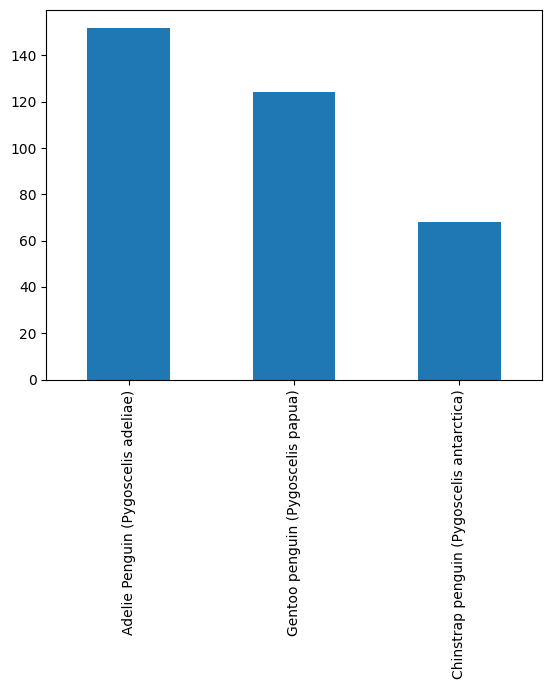

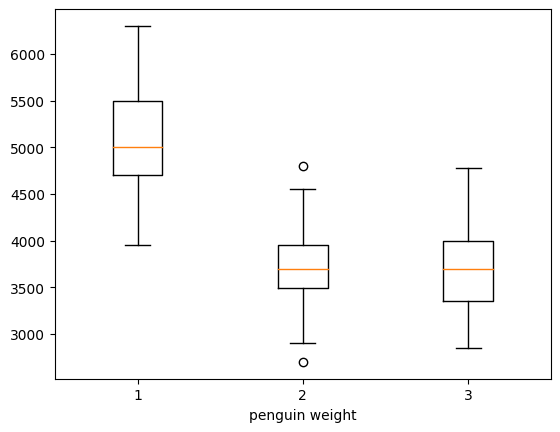

In [4]:
plt.figure()
data["Species"].value_counts().plot.bar()
plt.show()

plt.figure()
plt.xlabel("penguin weight")
gentoos = data.loc[(data["Species"] == "Gentoo penguin (Pygoscelis papua)") & (data["Body Mass (g)"].notna()), "Body Mass (g)"]
chinstrap = data.loc[(data["Species"] == "Chinstrap penguin (Pygoscelis antarctica)") & (data["Body Mass (g)"].notna()), "Body Mass (g)"]
adelie = data.loc[(data["Species"] == "Adelie Penguin (Pygoscelis adeliae)") & (data["Body Mass (g)"].notna()), "Body Mass (g)"]
plt.boxplot([gentoos, chinstrap, adelie])

plt.show()

Lze vidět, že jsou v datech tři druhy tučňáků, které jsou zastoupeny nerovnoměrně. Tato informace by se mohla hodit třeba pro určení apriori pravděpodobností při tvorbě generativního klasifikátoru druhů. Dále, jak bylo očekáváno, je hmotnost jednoho druhu mnohem vyšší než hmotnost druhých dvou druhů.

Další potenciální zajímavé srovnání je na dvou kategorických atributech "ostrov" a "druh". Zjistíme tak, zdali každý druh tučňáka žije na svém ostrově, nebo jsou promíchaní. 

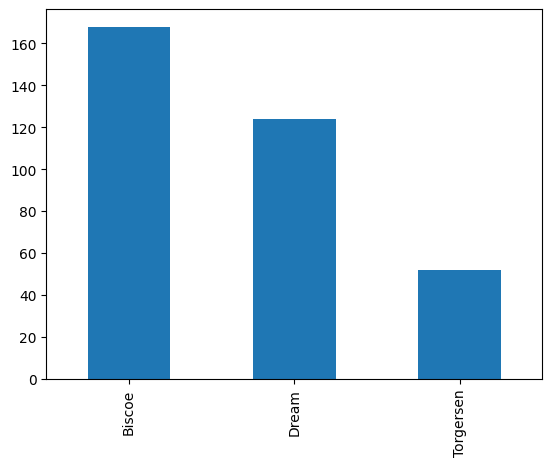

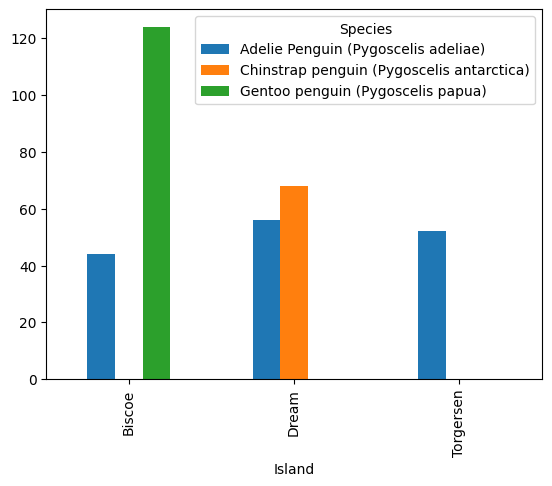

In [5]:
plt.figure()
data["Island"].value_counts().plot.bar()
plt.show()

counted = data[["Island", "Species"]].value_counts().reset_index().pivot(index="Island", columns="Species", values=0)
counted.plot.bar()
plt.show()


Dozvěděli jsme se, že druh Adelie žije na všech ostrovech, zatímco ostatní dva druhy žijí výhradně na svých dvou ostrovech (Biscoe a Dream).

Vhodné bude také prozkoumat navzájem numerické atributy pomocí korelačních koeficientů a bodových grafů, k tomuto však slouží kapitla 5).

### 3) Zjistěte, zda zvolená datová sada obsahuje nějaké odlehlé hodnoty. 

Přítomnost odlehlých hodnot u kvantitativních atributů lze dobře zjistit pomocí krabicových grafů. Vykreslíme tedy krabicové grafy pro všechny numerické atributy. 

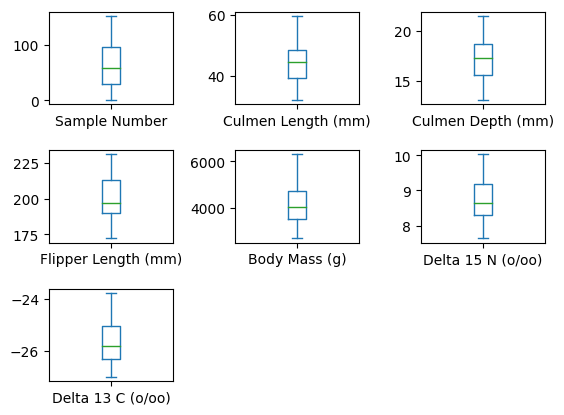

In [6]:
data_numeric = data.select_dtypes(include=np.number)
plt.figure()

for i, col in enumerate(data_numeric):
    plt.subplot(3,data_numeric.shape[1] - 4,i+1)
    data_numeric[col].plot.box()

plt.subplots_adjust(hspace=0.5, wspace=0.5)


Závěrem je, že žádný z numerických atributů neobsahuje odlehlé hodnoty. Takové hodnoty by byly v grafech znázorněny tečkami nad hranicemi minima či maxima.

### 4) Proveďte podrobnou analýzu chybějící hodnot (celkový počet chybějících hodnot, počet objektů s více chybějícími hodnotami atd.).

Následující tabulka zobrazuje přehled chybějících hodnot pro každý atribut datové sady. 

In [7]:
attr_counts = data.count().to_frame("count")
attr_counts["missing_count"] = data.shape[0] - attr_counts["count"] 
attr_counts["missing_perc"] = (attr_counts["missing_count"] / data.shape[0]) * 100
attr_counts



,count,missing_count,missing_perc
studyName,344,0,0.000000
Sample Number,344,0,0.000000
Species,344,0,0.000000
Region,344,0,0.000000
Island,344,0,0.000000
Stage,344,0,0.000000
Individual ID,344,0,0.000000
Clutch Completion,344,0,0.000000
Date Egg,344,0,0.000000
Culmen Length (mm),342,2,0.581395


Hodně vyčnívá atribut komentářů, kde chybí 92% hodnot. Prozkoumáme tedy položky, které komentář obsahují. 


In [8]:
data.loc[data["Comments"].notna(), ["Comments", "Sex", "Delta 13 C (o/oo)", "Delta 15 N (o/oo)", "Culmen Depth (mm)", "Body Mass (g)", "Clutch Completion"]]

,Comments,Sex,Delta 13 C (o/oo),Delta 15 N (o/oo),Culmen Depth (mm),Body Mass (g),Clutch Completion
0,Not enough blood for isotopes.,MALE,NaN,NaN,18.7,3750.0,Yes
3,Adult not sampled.,NaN,NaN,NaN,NaN,NaN,Yes
6,Nest never observed with full clutch.,FEMALE,-25.21799,9.18718,17.8,3625.0,No
7,Nest never observed with full clutch.,MALE,-24.89958,9.46060,19.6,4675.0,No
8,No blood sample obtained.,NaN,NaN,NaN,18.1,3475.0,Yes
9,No blood sample obtained for sexing.,NaN,-25.09368,9.13362,20.2,4250.0,Yes
10,No blood sample obtained for sexing.,NaN,-25.21315,8.63243,17.1,3300.0,Yes
11,No blood sample obtained.,NaN,NaN,NaN,17.3,3700.0,Yes
12,Not enough blood for isotopes.,FEMALE,NaN,NaN,17.6,3200.0,Yes
13,Not enough blood for isotopes.,MALE,NaN,NaN,21.2,3800.0,Yes


Z tabulky je vidět, že přítomnost komentáře buď znamená, že právě nějaký další podstatný atribut chybí, nebo je atribut "Clutch Completion" nastaven na "No". Atribut komentáře je tedy díky této závislosti naprosto irelevantní (o tučňákovi neříká žádnou informaci navíc) a nebudeme jej dále brát v potaz.

Dále prozkoumáme ostatní chybějící atributy po dvojcích. Kolika položkám chybí dva atributy zároveň (pro každou dvojici) ?

In [9]:
missing_attrs = attr_counts[attr_counts["missing_count"] > 0].index.to_frame()
missing_attrs = missing_attrs.drop(index="Comments")

cartesian = missing_attrs.merge(missing_attrs, how="cross")
cartesian["counts"] = cartesian.apply(lambda x: data[(data[x["0_y"]].isna()) & (data[x["0_x"]].isna())].shape[0], axis=1)
pivoted = cartesian.pivot(index="0_x", columns="0_y", values="counts")
display(pivoted)

0_y,Body Mass (g),Culmen Depth (mm),Culmen Length (mm),Delta 13 C (o/oo),Delta 15 N (o/oo),Flipper Length (mm),Sex
0_x,,,,,,,
Body Mass (g),2,2,2,2,2,2,2
Culmen Depth (mm),2,2,2,2,2,2,2
Culmen Length (mm),2,2,2,2,2,2,2
Delta 13 C (o/oo),2,2,2,13,13,2,5
Delta 15 N (o/oo),2,2,2,13,14,2,5
Flipper Length (mm),2,2,2,2,2,2,2
Sex,2,2,2,5,5,2,10


Je zřejmé, že chybějící atributy Delta spolu souvisí - chybí-li jeden, tak chybí i druhý. 

### 5) Proveďte korelační analýzu numerických atributů (k analýze využijte i grafy a korelační koeficienty).

Nejdříve pomocí korelační matice zjistíme přehled o míře závislosti všech dvojic atributů. 

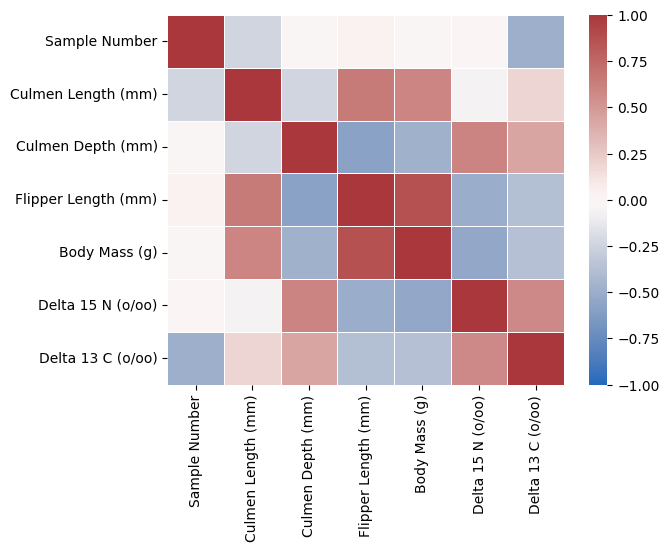

In [10]:
prs_coeffs = data_numeric.corr(method="pearson")


sns.heatmap(prs_coeffs, linewidths=0.5, cmap="vlag", vmin=-1, vmax=1)
plt.show()


Z korelační matice je patrné, že datová sada obsahuje pozitivně i negativně korelované atributy. Nicméně tato korelace byla provedena nad všemi tučňáky, což by mohlo vést ke zkreslení, neboť jak již bylo zjištěno, tak rozsahy hodnot některých numerických atributů se liší v závislosti na druhu tučňáka. Jelikož máme pouze tři druhy, půjde to snadno ověřit na bodových grafech.

<AxesSubplot: xlabel='Delta 13 C (o/oo)', ylabel='Delta 15 N (o/oo)'>

<Figure size 640x480 with 0 Axes>

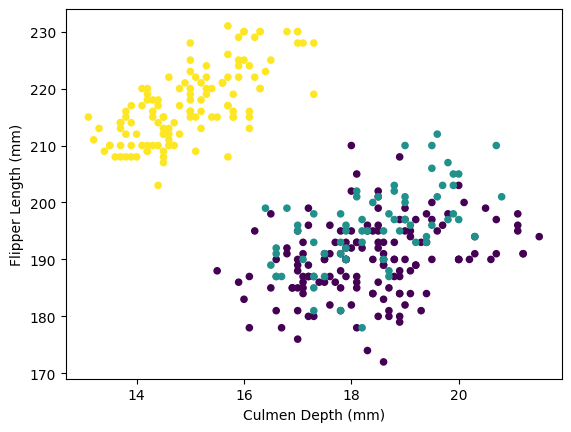

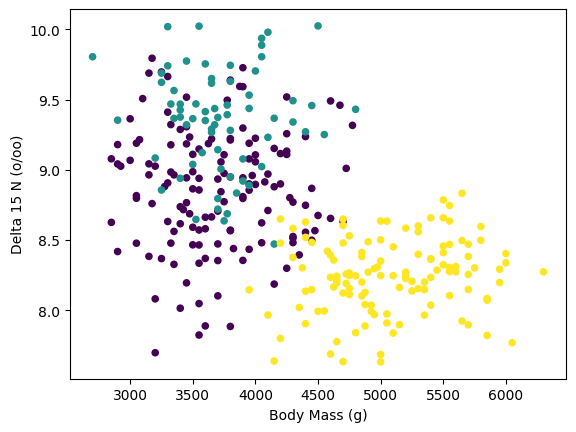

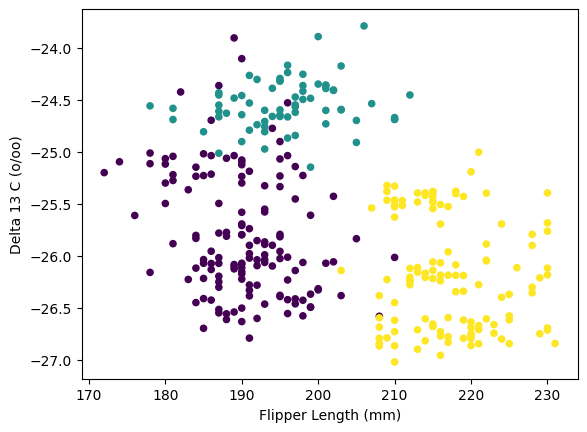

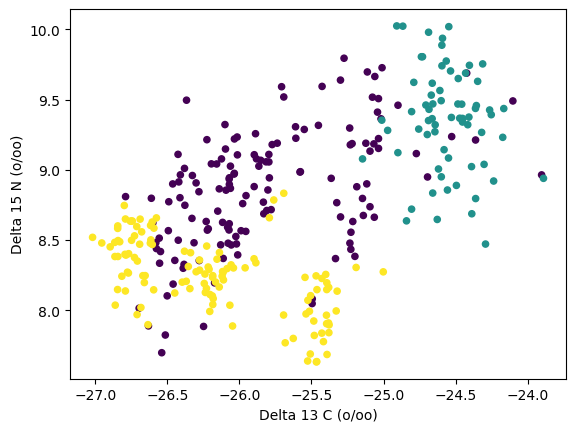

In [11]:
plt.figure()
spec_keys = list(data["Species"].unique())
spec_nums = np.arange(len(spec_keys)) / len(spec_keys)
spec_map = dict(zip(spec_keys, spec_nums))
colors = data["Species"].map(spec_map)
data_numeric.plot.scatter(x="Culmen Depth (mm)", y="Flipper Length (mm)", c=colors)
data_numeric.plot.scatter(x="Body Mass (g)", y="Delta 15 N (o/oo)", c=colors)
data_numeric.plot.scatter(x="Flipper Length (mm)", y="Delta 13 C (o/oo)", c=colors)
data_numeric.plot.scatter(x="Delta 13 C (o/oo)", y="Delta 15 N (o/oo)", c=colors)

Jedna z vad korelace nad všemi daty je patrná u závislosti Flipper length na Culmen Depth. Ačkoliv korelační matice tvrdí, že tyto atributy jako celek jsou negativně korelované, tak pro každý druh zvlášť jsou korelované pozitivně. 

Podobně si lze všimnout chyby i u závislostí dvou parametrů Delta nebo parametru Delta 15 na Body mass. Zde korelační matice odhalila korelaci, nicméně z pohledu na grafy lze konstatovat, že pro každý druh zvlášť tam žádná korelace neexistuje.

Proto bude vhodné provést korelaci pro každý druh zvlášť a výsledek dát dohromady. Vznikne následující korelační matice:

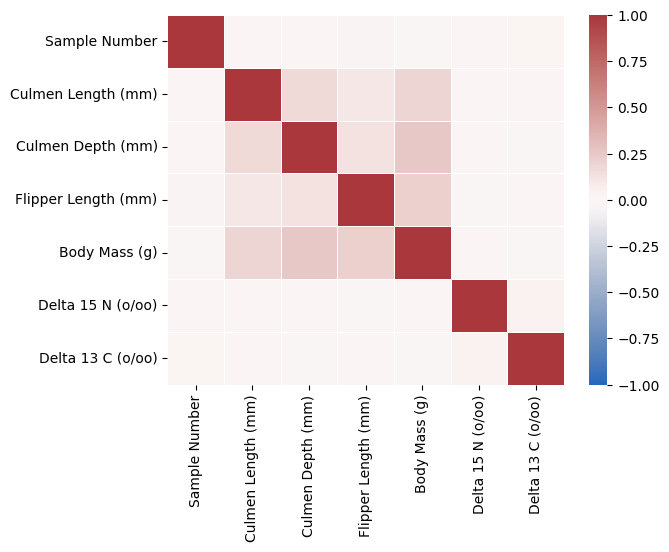

In [12]:
peng_types = ["Adelie Penguin (Pygoscelis adeliae)", "Chinstrap penguin (Pygoscelis antarctica)", "Gentoo penguin (Pygoscelis papua)"]

spec1_c = data[data["Species"] == peng_types[0]].select_dtypes(np.number).corr()
spec2_c = data[data["Species"] == peng_types[1]].select_dtypes(np.number).corr()
spec3_c = data[data["Species"] == peng_types[2]].select_dtypes(np.number).corr() 
# TODO - refactor to lloop


sns.heatmap(spec1_c * spec2_c * spec3_c, linewidths=0.5, cmap="vlag", vmin=-1, vmax=1)
plt.show()

Dle této matice je patrné, že rozměrové charakteristiky tučňáku jsou přímo úměrně korelované s hmotností tučňáka, což při uvážení konstatní hustoty tučňáků dává smysl. 

##### 6) Odstraňte z datové sady atributy, které jsou pro danou dolovací úlohu irelevantní.

Volíme dolovací úlohu klasifikace druhu tučňáka. Následující tabulka zobrazuje zbytečné atributy pro dolování:

In [13]:
NECHAR = "nijak necharakterizuje vlastnosti tučňáka"
KONSTAN = "je konstatní pro všechny položky"

delete_attr = [
    ("studyName", "nijak necharakterizuje vlastnosti tučňáka"),
    ("Region", KONSTAN),
    ("Stage", KONSTAN),
    ("Individual ID", NECHAR),
    ("Clutch Completion", NECHAR),
    ("Comments", NECHAR),
    ("Date Egg", "není k dispozici informace, ke kterému datu byl každý záznam pořízen,\n proto nelze vypočítat věk tučňáka a tím pádem je tento atribut nepoužitelný"),
    ("Sample Number", NECHAR),
]

display(pd.DataFrame(delete_attr, columns=["attr_name", "reason"]))

data_dol = data.drop([x[0] for x in delete_attr], axis=1)

,attr_name,reason
0,studyName,nijak necharakterizuje vlastnosti tučňáka
1,Region,je konstatní pro všechny položky
2,Stage,je konstatní pro všechny položky
3,Individual ID,nijak necharakterizuje vlastnosti tučňáka
4,Clutch Completion,nijak necharakterizuje vlastnosti tučňáka
5,Comments,nijak necharakterizuje vlastnosti tučňáka
6,Date Egg,"není k dispozici informace, ke kterému datu by..."
7,Sample Number,nijak necharakterizuje vlastnosti tučňáka


#### 7) Vypořádejte se s chybějícími hodnotami. Pro odstranění těchto hodnot využijte alespoň dvě různé metody pro odstranění chybějících hodnot.

Culmen Length (mm)	342	2	0.581395
Culmen Depth (mm)	342	2	0.581395
Flipper Length (mm)	342	2	0.581395
Body Mass (g)	342	2	

První metodu, kterou použijeme, je ignorování záznamu. Toto provedeme pouze u těch chybějících atributů, které se týkají malého množství položek, tedy Culmen Length, Culmen Depth, Flipper Length, Body Mass, takto přijdeme maximálně jen o 8 záznamů. 

Po této operaci stále zbylo několik chybějících záznamů, kterých je však větší počet a vyplatí se doplnit na validní hodnoty.
U pohlaví je třeba si dát pozor také na nevalidní hodnotu `.`, kterou jsme detekovali dříve a považovat ji také za chybějící, ačkoliv byla původně automaticky interpretována jako validní.

Jelikož jsme dříve zjistili, že pohlaví tučňáka souvisí s jeho hmotností, odhadneme pohlaví tučňáků na základě bayesovské klasifikace s pomocí rysu hmotnosti. Toto musíme provést pro každý druh zvlášť

Pro zbylé dva atributy Delta jsme korelace nenašli a odhadneme je proto jako hodnoty charakterizující střed, jako aritmetický průměr, opět pro každý zvlášť. 

Výsledek: všechny chybějící hodnoty eliminovány:

In [14]:
# Just drop items with missing values that are not that frequent - only very few items will be lost
data_dol = data_dol.dropna(subset=["Culmen Length (mm)", "Culmen Depth (mm)", "Flipper Length (mm)", "Body Mass (g)"], how="any")

# Fix invalid Sex value so it is undefined
data_dol.loc[data_dol["Sex"] == ".", "Sex"] = pd.NA

for kind in peng_types:
    # Guess Sex by bayes classification on weight - need to do this separately for all three penguin types, since they differ in weight a lot
    body_masses_males = data_dol.loc[(data_dol["Species"] == kind) & (data_dol["Sex"] == "MALE"), "Body Mass (g)"]
    body_masses_females = data_dol.loc[(data_dol["Species"] == kind) & (data_dol["Sex"] == "FEMALE"), "Body Mass (g)"]
    male_norm = scipy.stats.norm(body_masses_males.mean(), body_masses_males.std())
    female_norm = scipy.stats.norm(body_masses_females.mean(), body_masses_females.std())
    apriori_male = 0.5 # TODO
    apriori_female = 1 - apriori_male
    def compute_sex(row):
        maleobs = male_norm.pdf(row["Body Mass (g)"]) * apriori_male
        femaleobs = female_norm.pdf(row["Body Mass (g)"]) * apriori_female
        p_bayes_male = maleobs / (maleobs + femaleobs)
        return "MALE" if p_bayes_male >= 0.5 else "FEMALE"

    targets_cond = (data_dol["Sex"].isna()) & (data_dol["Species"] == kind)
    data_dol.loc[targets_cond, "Sex"] = data_dol.loc[targets_cond].apply(compute_sex, axis=1)


    # Use mean on deltas
    delta15mean = float(data_dol.loc[data_dol["Species"] == kind, ["Delta 15 N (o/oo)"]].mean())
    delta13mean = float(data_dol.loc[data_dol["Species"] == kind, ["Delta 13 C (o/oo)"]].mean())

    data_dol.loc[(data_dol["Delta 13 C (o/oo)"].isna()) & (data_dol["Species"] == kind), "Delta 13 C (o/oo)"] = delta13mean
    data_dol.loc[(data_dol["Delta 15 N (o/oo)"].isna()) & (data_dol["Species"] == kind), "Delta 15 N (o/oo)"] = delta15mean
    
    
display(data_dol.isna().sum())

Species                0
Island                 0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

#### 8) Vypořádejte se s odlehlými hodnotami, jsou-li v sadě přítomny. 

Zjistili jsme, že odlehlé hodnoty nejsou přítomny. 

#### 9) Pro jednu variantu datové sady proveďte diskretizaci numerických atributů tak, aby výsledná datová sada byla vhodná pro algoritmy, které vyžadují na vstupu kategorické atributy.



Pro diskretizaci numerických atributů použijeme techniku plnění košů (binning). 
Pro různé typy atributů si vytvoříme odpovídající sadu kategorií a hodnoty do nich rozdistribuujeme. 
Numerické atributy se tak stanou kategorickými.

Sady kategorií budou následující: 
- Atributy délky (Culmen Length (mm), Culmen Depth (mm), Flipper Length (mm)) = `["shortest", "shorter", "short", "medium", "long", "longer", "longest"]`
- Atribut hmotnosti = `["lightest", "lighter", "light", "medium", "heavy", "heavier", "heaviest"]`
- Atributy Delta (neznámý význam) = `["class1", "class2", "class3", "class4"]`

Výsledná datová sada převedená na kategorické atributy je k dispozici v souboru `data_processed1.csv`.

In [15]:
data_processed1 = data_dol.copy(deep=True)

length_categories = ["shortest", "shorter", "short", "medium", "long", "longer", "longest"]
length_bins = len(length_categories) 

data_processed1["Culmen Length (mm)"] = pd.cut(data_processed1["Culmen Length (mm)"], bins=length_bins, labels=length_categories)
data_processed1["Culmen Depth (mm)"] = pd.cut(data_processed1["Culmen Depth (mm)"], bins=length_bins, labels=length_categories)
data_processed1["Flipper Length (mm)"] = pd.cut(data_processed1["Flipper Length (mm)"], bins=length_bins, labels=length_categories)

mass_categories = ["lightest", "lighter", "light", "medium", "heavy", "heavier", "heaviest"]
mess_bins = len(mass_categories)

data_processed1["Body Mass (g)"] = pd.cut(data_processed1["Body Mass (g)"], bins=mess_bins, labels=mass_categories)

delta_categories = ["class1", "class2", "class3", "class4"]
delta_bins = len(delta_categories)

data_processed1["Delta 15 N (o/oo)"] = pd.cut(data_processed1["Delta 15 N (o/oo)"], bins=delta_bins, labels=delta_categories)
data_processed1["Delta 13 C (o/oo)"] = pd.cut(data_processed1["Delta 13 C (o/oo)"], bins=delta_bins, labels=delta_categories)

data_processed1.to_csv("data_processed1.csv", index=False)

#### 10) Pro druhou variantu datové sady proveďte vhodnou transformaci kategorických atributů na numerické atributy. Dále pak proveďte normalizaci numerických atributů, které má smysl normalizovat. Výsledná datová sada by měla být vhodná pro metody vyžadující numerické vstupy.

Relevantní kategorické atributy v datové sadě jsou:

- Druh (Species) = `["Adelie Penguin (Pygoscelis adeliae)", "Gentoo penguin (Pygoscelis papua)", "Chinstrap penguin (Pygoscelis antarctica)"]`
- Ostrov (Island) = `["Dream", "Torgersen", "Biscoe"]`
- Pohlaví (Sex) = `["MALE", "FEMALE"]`

Na těchto atributech neexistuje žádné smysluplné uspořádání, proto nezbývá převod provést prostým mapováním řetězců na celočíselné hodnoty.

Výsledná datová sada převedená na numerické atributy je k dispozici v souboru `data_processed2.csv`.

In [16]:
data_processed2 = data_dol.copy(deep=True)

kind_map = { 
    "Adelie Penguin (Pygoscelis adeliae)": 0,
    "Gentoo penguin (Pygoscelis papua)": 1,
    "Chinstrap penguin (Pygoscelis antarctica)": 2
}

data_processed2["Species"] = data_processed2["Species"].map(kind_map)

island_map = {
    "Dream": 0,
    "Torgersen": 1,
    "Biscoe": 2
}

data_processed2["Island"] = data_processed2["Island"].map(island_map)

sex_map = {
    "MALE": 0,
    "FEMALE": 1
}

data_processed2["Sex"] = data_processed2["Sex"].map(sex_map)

data_processed2.to_csv("data_processed2.csv", index=False)